In [10]:
###Credit EDA Case study



In [11]:
## Introduction
### This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objectives
#This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

#In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [12]:
1. Importing the libraries and files

SyntaxError: invalid syntax (Temp/ipykernel_25044/1955464638.py, line 1)

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [113]:
CurrentApplication = pd.read_csv('C:/Users/Pompy/OneDrive/Desktop/Credit_EDA_case_study/application_data.csv')
PreviousApplication = pd.read_csv('C:/Users/Pompy/OneDrive/Desktop/Credit_EDA_case_study/previous_application.csv')

In [114]:
# CurrentApplication Data Check

In [118]:
CurrentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [119]:
CurrentApplication.shape

(307511, 122)

In [117]:
CurrentApplication.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [120]:
CurrentApplication.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [121]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #TO DISPLAY ALL COLUMNS
(CurrentApplication.isnull().sum()/len(CurrentApplication.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [122]:
Cheking CurrentApplication dataset

SyntaxError: invalid syntax (Temp/ipykernel_25044/3435393277.py, line 1)

In [125]:
##Remove columns with > 50% missing data

In [126]:
# Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
CurrentApplication = CurrentApplication.loc[:,CurrentApplication.isnull().mean()<=0.5]
CurrentApplication.shape

(307511, 81)

In [127]:
#Selecting columns with less or equal to than 13% null vallues
list(CurrentApplication.columns[(CurrentApplication.isnull().mean()<=0.13) & (CurrentApplication.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [128]:
#Missing values treatment (Impute/Remove)

#COLUMN: [OCCUPATION_TYPE]

In [129]:
CurrentApplication.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [130]:
CurrentApplication['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

In [131]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
CurrentApplication.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

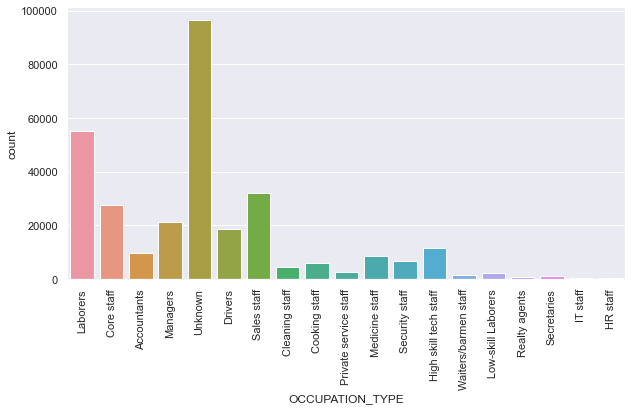

In [132]:
plt.figure(figsize = (10,5))
sns.countplot(data = CurrentApplication, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

In [135]:
##Column [EXT_SOURCE_2]

In [136]:
CurrentApplication.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.115152      1
0.062815      1
0.009800      1
0.150713      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119828, dtype: int64

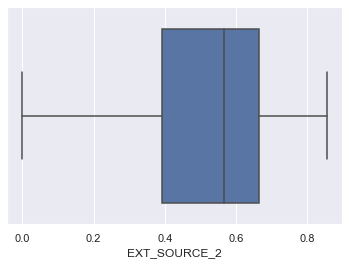

In [137]:
sns.boxplot(CurrentApplication.EXT_SOURCE_2)
plt.show()

In [138]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
imputevalue = round(CurrentApplication['EXT_SOURCE_2'].mean(),2)

In [139]:
CurrentApplication['EXT_SOURCE_2'] = CurrentApplication['EXT_SOURCE_2'].fillna(CurrentApplication['EXT_SOURCE_2'].mean(skipna = True))

In [140]:
#Analysis of six columns with 13.5% missing values
##AMT_REQ_CREDIT_BUREAU_YEAR
##AMT_REQ_CREDIT_BUREAU_QRT
##AMT_REQ_CREDIT_BUREAU_MON
##AMT_REQ_CREDIT_BUREAU_WEEK
##AMT_REQ_CREDIT_BUREAU_DAY
##AMT_REQ_CREDIT_BUREAU_HOUR

In [141]:
CurrentApplication[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [142]:
CurrentApplication[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
CurrentApplication['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [144]:
CurrentApplication['NAME_TYPE_SUITE'].fillna(value = 'Unknown', inplace = True)

In [145]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
CurrentApplication.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [148]:
##Column ["AMT_ANNUITY"]

In [149]:
CurrentApplication[CurrentApplication ["AMT_ANNUITY"].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,0.9662,0.0417,0.9662,0.0417,0.9662,0.0417,0.0090,No,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.9841,0.4583,0.9841,0.4583,0.9841,0.4583,0.0679,No,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.9831,0.1667,0.9831,0.1667,0.9831,0.1667,0.0687,No,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant

In [150]:
CurrentApplication['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

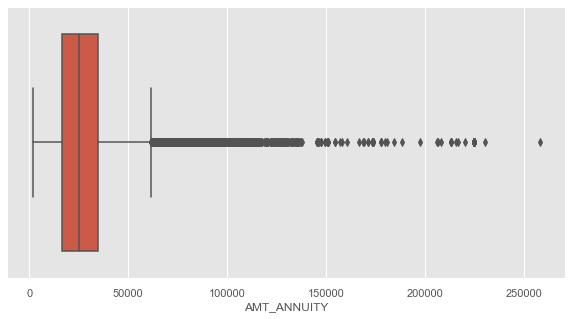

In [151]:
# AMT_ANNUITY is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(CurrentApplication['AMT_ANNUITY'])
plt.show()

In [152]:
CurrentApplication["AMT_ANNUITY"].median(skipna = True)

24903.0

In [153]:
CurrentApplication["AMT_ANNUITY"] = CurrentApplication["AMT_ANNUITY"].fillna(CurrentApplication["AMT_ANNUITY"].median(skipna = True))

In [154]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
CurrentApplication.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [155]:
Column ["CODE_GENDER"]

NameError: name 'Column' is not defined

In [156]:
CurrentApplication["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [157]:
CurrentApplication["CODE_GENDER"].fillna(value = 'Unknown', inplace = True)

In [158]:
# Replacing XNA value with F
CurrentApplication.loc[CurrentApplication.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
CurrentApplication.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [159]:
CurrentApplication.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [160]:
CurrentApplication = CurrentApplication.replace('XNA',np.NaN)

In [161]:
Column ["AMT_GOODS_PRICE"]

NameError: name 'Column' is not defined

In [162]:
CurrentApplication["AMT_GOODS_PRICE"].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

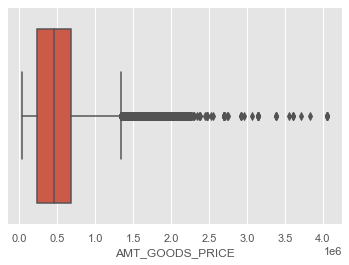

In [163]:
sns.boxplot(CurrentApplication['AMT_GOODS_PRICE'])
plt.show()

In [164]:
CurrentApplication['AMT_GOODS_PRICE'].median(skipna = True)

450000.0

In [165]:
CurrentApplication['AMT_GOODS_PRICE'] = CurrentApplication['AMT_GOODS_PRICE'].fillna(CurrentApplication['AMT_GOODS_PRICE'].median(skipna = True))

In [166]:
CurrentApplication.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

In [ ]:
## DATA ANALYSIS

In [ ]:
### Errors in Data types and Data

In [167]:
# Checking the values present in columns starting with 'DAYS'
print(CurrentApplication['DAYS_BIRTH'].unique())
print(CurrentApplication['DAYS_EMPLOYED'].unique())
print(CurrentApplication['DAYS_REGISTRATION'].unique())
print(CurrentApplication['DAYS_ID_PUBLISH'].unique())
print(CurrentApplication['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [168]:
filter_col = [col for col in CurrentApplication if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [169]:
CurrentApplication[filter_col]= abs(CurrentApplication[filter_col])

In [170]:
print(CurrentApplication['DAYS_BIRTH'].unique())
print(CurrentApplication['DAYS_EMPLOYED'].unique())
print(CurrentApplication['DAYS_REGISTRATION'].unique())
print(CurrentApplication['DAYS_ID_PUBLISH'].unique())
print(CurrentApplication['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [171]:
CurrentApplication.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [172]:
Binning variables for analysis

SyntaxError: invalid syntax (Temp/ipykernel_25044/2493672905.py, line 1)

In [173]:
CurrentApplication['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [174]:
CurrentApplication['INCOME_GROUP']=pd.qcut(CurrentApplication['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [175]:
#Binning DAYS_BIRTH
abs(CurrentApplication['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [176]:
CurrentApplication['AGE']=abs(CurrentApplication['DAYS_BIRTH'])//365.25

In [177]:
CurrentApplication['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [178]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
CurrentApplication['AGE_GROUP'] = pd.cut(CurrentApplication['AGE'],bins=np.arange(20,71,5))



In [179]:
## Adding one more column that will be used for analysis later
CurrentApplication['CREDIT_INCOME_RATIO']=round((CurrentApplication['AMT_CREDIT']/CurrentApplication['AMT_INCOME_TOTAL']))

In [180]:
### Getting the percentage of social circle who defaulted
CurrentApplication['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=CurrentApplication['DEF_30_CNT_SOCIAL_CIRCLE']/CurrentApplication['OBS_30_CNT_SOCIAL_CIRCLE']
CurrentApplication['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=CurrentApplication['DEF_60_CNT_SOCIAL_CIRCLE']/CurrentApplication['OBS_60_CNT_SOCIAL_CIRCLE']

In [181]:
# Creating bins for income amount (AMT_INCOME_TOTAL)
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

CurrentApplication['AMT_INCOME_RANGE'] = pd.cut(CurrentApplication['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

In [182]:
CurrentApplication["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [183]:
#Creating bins for Credit amount (AMT_CREDIT)

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

CurrentApplication['AMT_CREDIT_RANGE'] = pd.cut(applicationData['AMT_CREDIT'], bins=bins, labels=slots)

NameError: name 'applicationData' is not defined

In [184]:
CurrentApplication["AMT_CREDIT"].head()

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64

In [185]:
#Dividing the dataset into two datasets of  target=1 (client with payment difficulties) and target=0 (all other cases)
#We will be using these two datasets for few comparisons
target0 = CurrentApplication[CurrentApplication["TARGET"]==0]
target1 = CurrentApplication[CurrentApplication["TARGET"]==1]

In [186]:
print(target0.shape)
print(target1.shape)

(282686, 88)
(24825, 88)


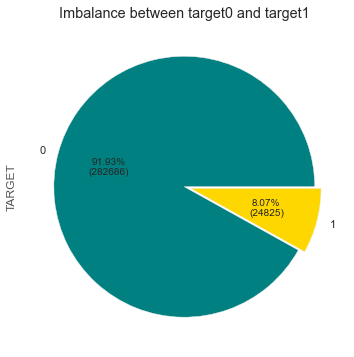

In [187]:
#Calculating Imbalance percentage for target 0 and target 1. 
#Visualizing the above result in a pie plot

total = len(CurrentApplication["TARGET"])
explode = [0, 0.05]

def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100) #to print both the percentage and value together

plt.figure(figsize = [6, 6])
plt.title("Imbalance between target0 and target1")
CurrentApplication["TARGET"].value_counts().plot.pie(autopct = my_fmt, colors = ["teal", "gold"], explode = explode)

plt.show()

In [188]:
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_CREDIT','AMT_INCOME_TOTAL',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [189]:
CurrentApplication_Final=CurrentApplication[FinalColumns]

In [190]:
CurrentApplication_Final.shape

(307511, 25)

In [191]:
# Dividing the original dataset into two different datasets depending upon the target value
App1=CurrentApplication_Final[CurrentApplication_Final.TARGET==0]    # Dataframe with all the data related to non-defaulters
App2=CurrentApplication_Final[CurrentApplication_Final.TARGET==1]    # Dataframe with all the data related to defaulters

In [192]:
 #Univariate Analysis of Categorical Variables

In [193]:
#Plotting graphs for Target0 (Customers with no payment difficulties)

In [194]:
App2['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending = False)

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [195]:
App1['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending = False)

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

In [196]:
def functionPlot(df, col, title, xtitle, ytitle, hue = None):
    
    sns.set_style("white")
    sns.set_context("notebook")    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)

    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue, palette='deep') 
    ax.set(xlabel = xtitle, ylabel = ytitle)    
    plt.show()

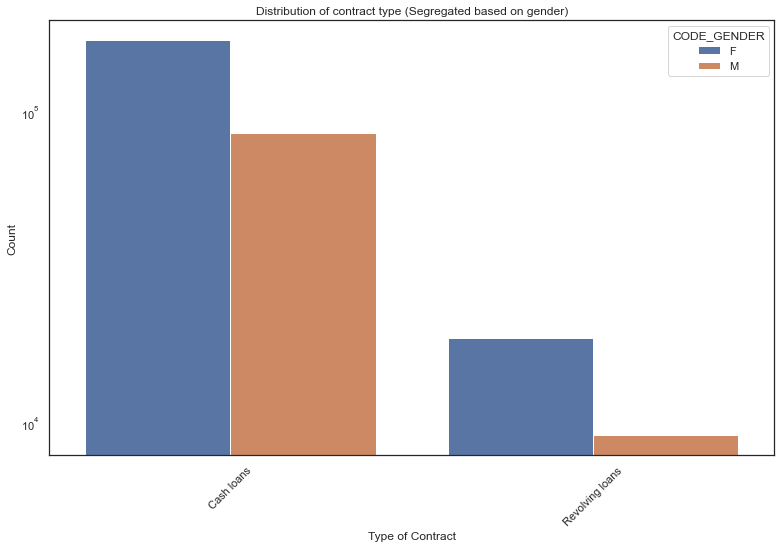

In [197]:
functionPlot(App1, col='NAME_CONTRACT_TYPE', title='Distribution of contract type (Segregated based on gender)', hue='CODE_GENDER', xtitle = "Type of Contract", ytitle = "Count")

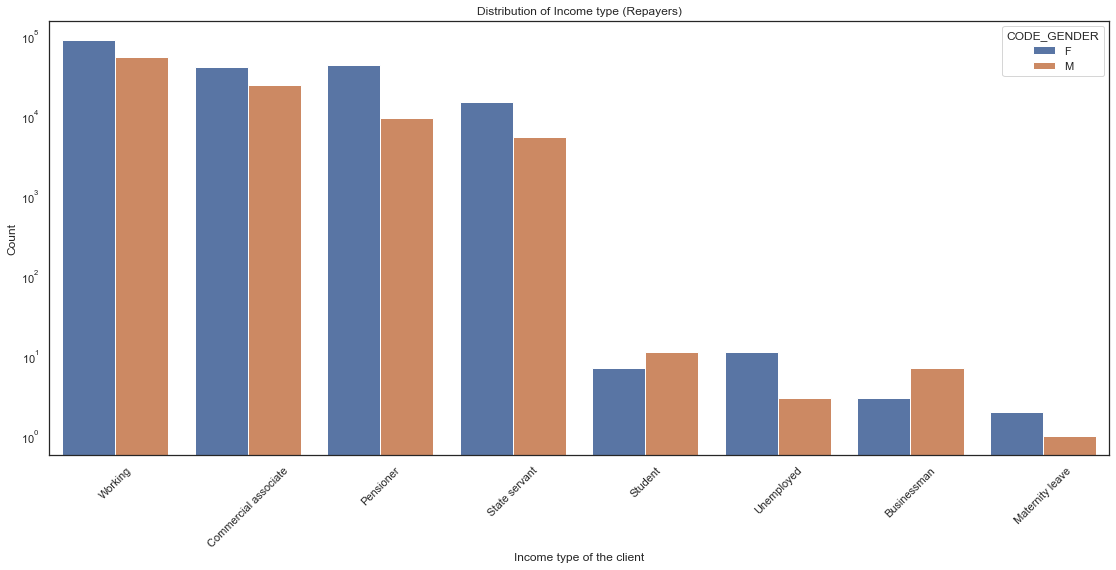

In [198]:
functionPlot(App1, col='NAME_INCOME_TYPE', title='Distribution of Income type (Repayers)', hue='CODE_GENDER', xtitle = "Income type of the client", ytitle = "Count")

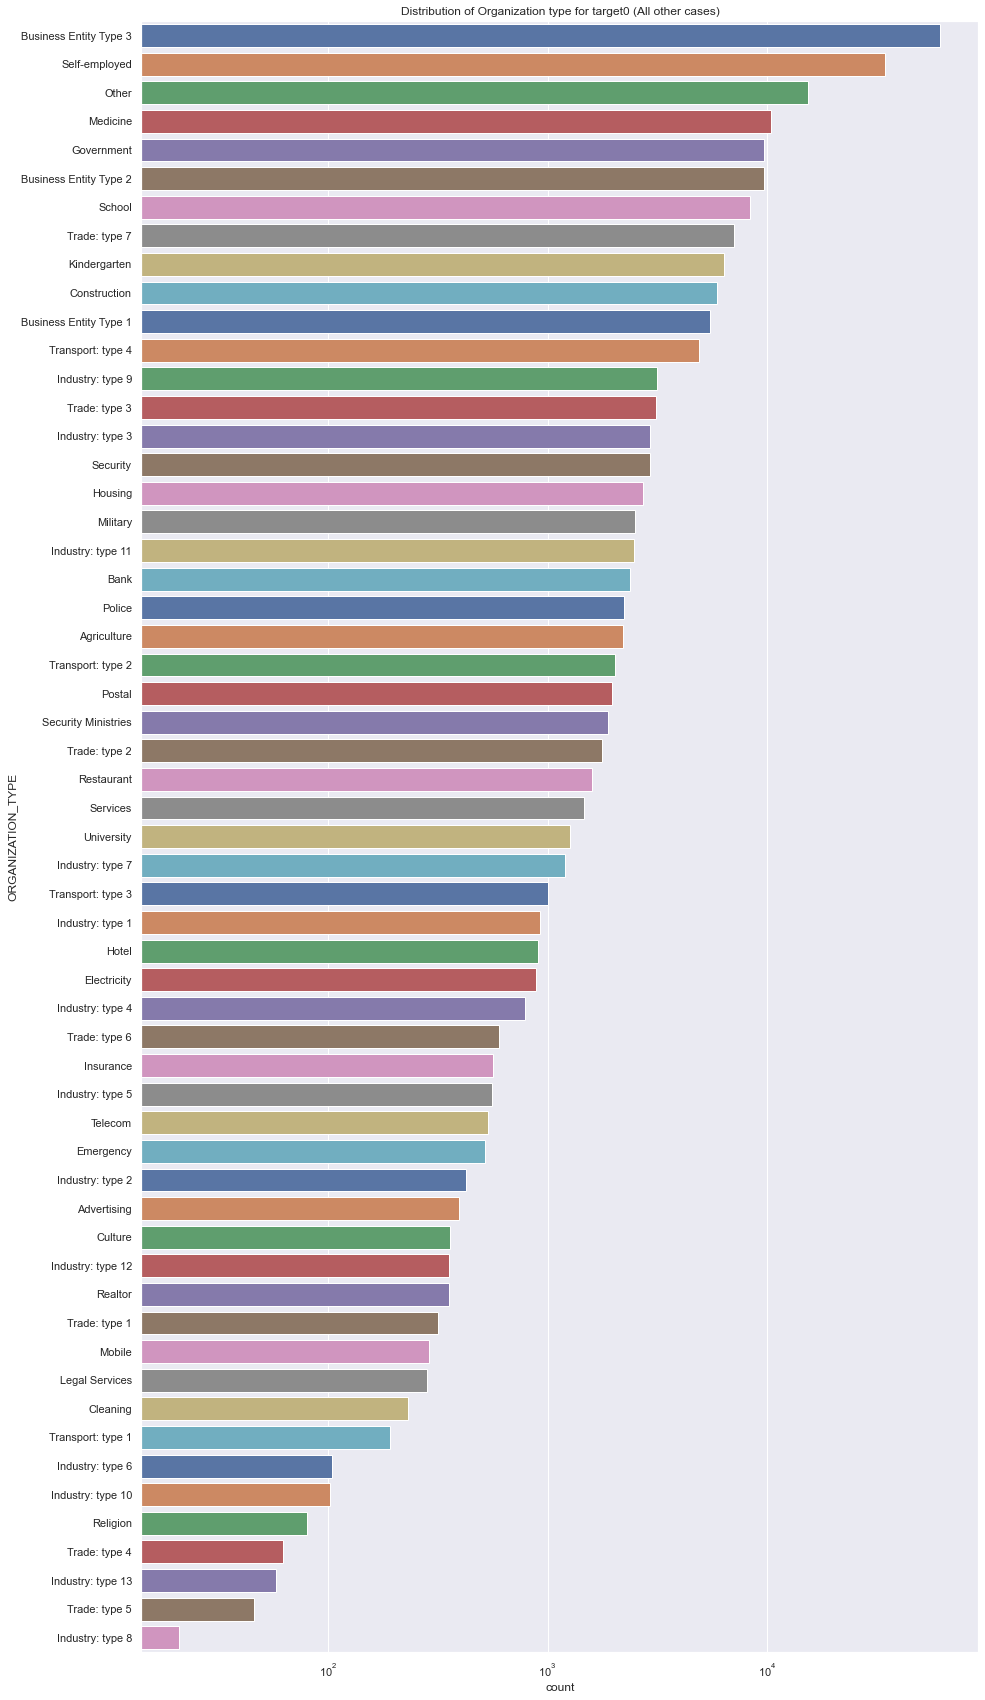

In [199]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize = [15,30])

plt.title("Distribution of Organization type for target0 (All other cases)")
plt.xscale('log')

sns.countplot(data=App1,y='ORGANIZATION_TYPE',order=App1['ORGANIZATION_TYPE'].value_counts().index, palette='deep')

plt.show()

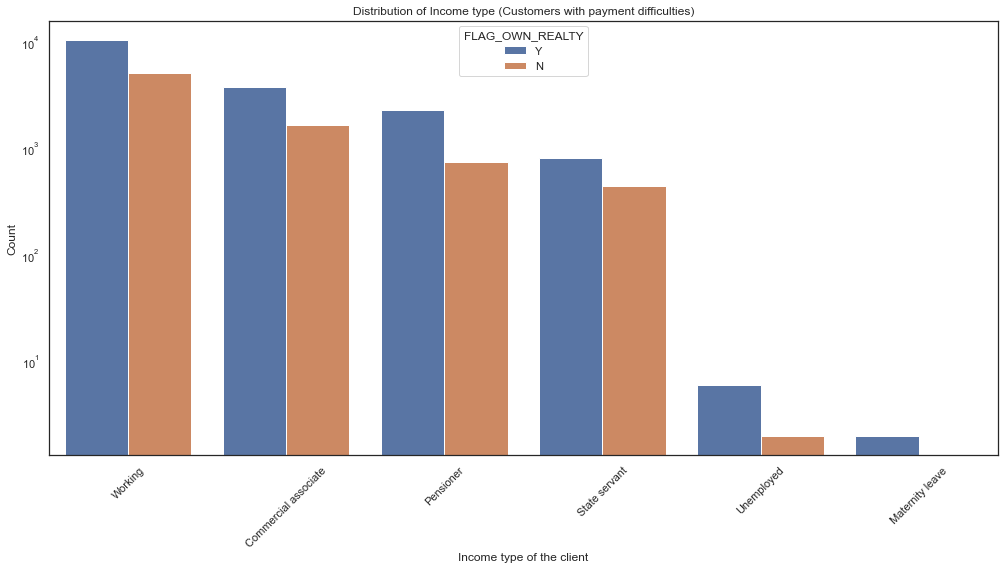

In [200]:

functionPlot(App2, col='NAME_INCOME_TYPE', title='Distribution of Income type (Customers with payment difficulties)', hue='FLAG_OWN_REALTY', xtitle = "Income type of the client", ytitle = "Count")

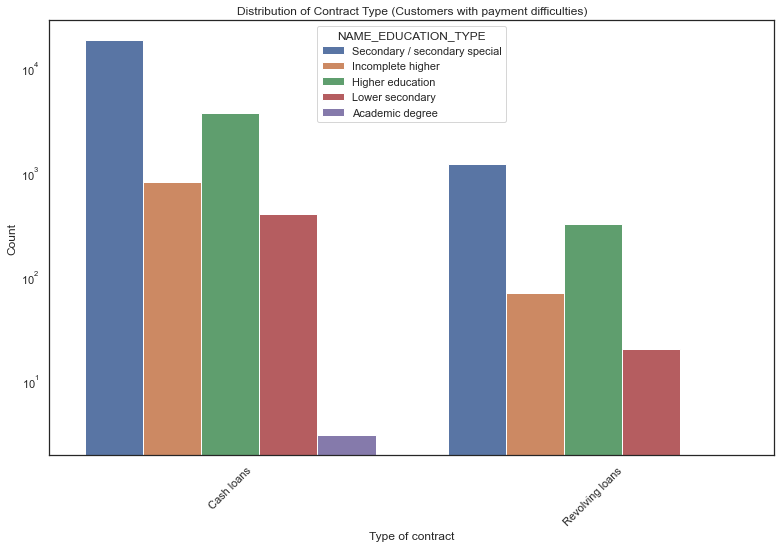

In [201]:
functionPlot(App2, col='NAME_CONTRACT_TYPE', title='Distribution of Contract Type (Customers with payment difficulties)', hue='NAME_EDUCATION_TYPE', xtitle = "Type of contract", ytitle = "Count")

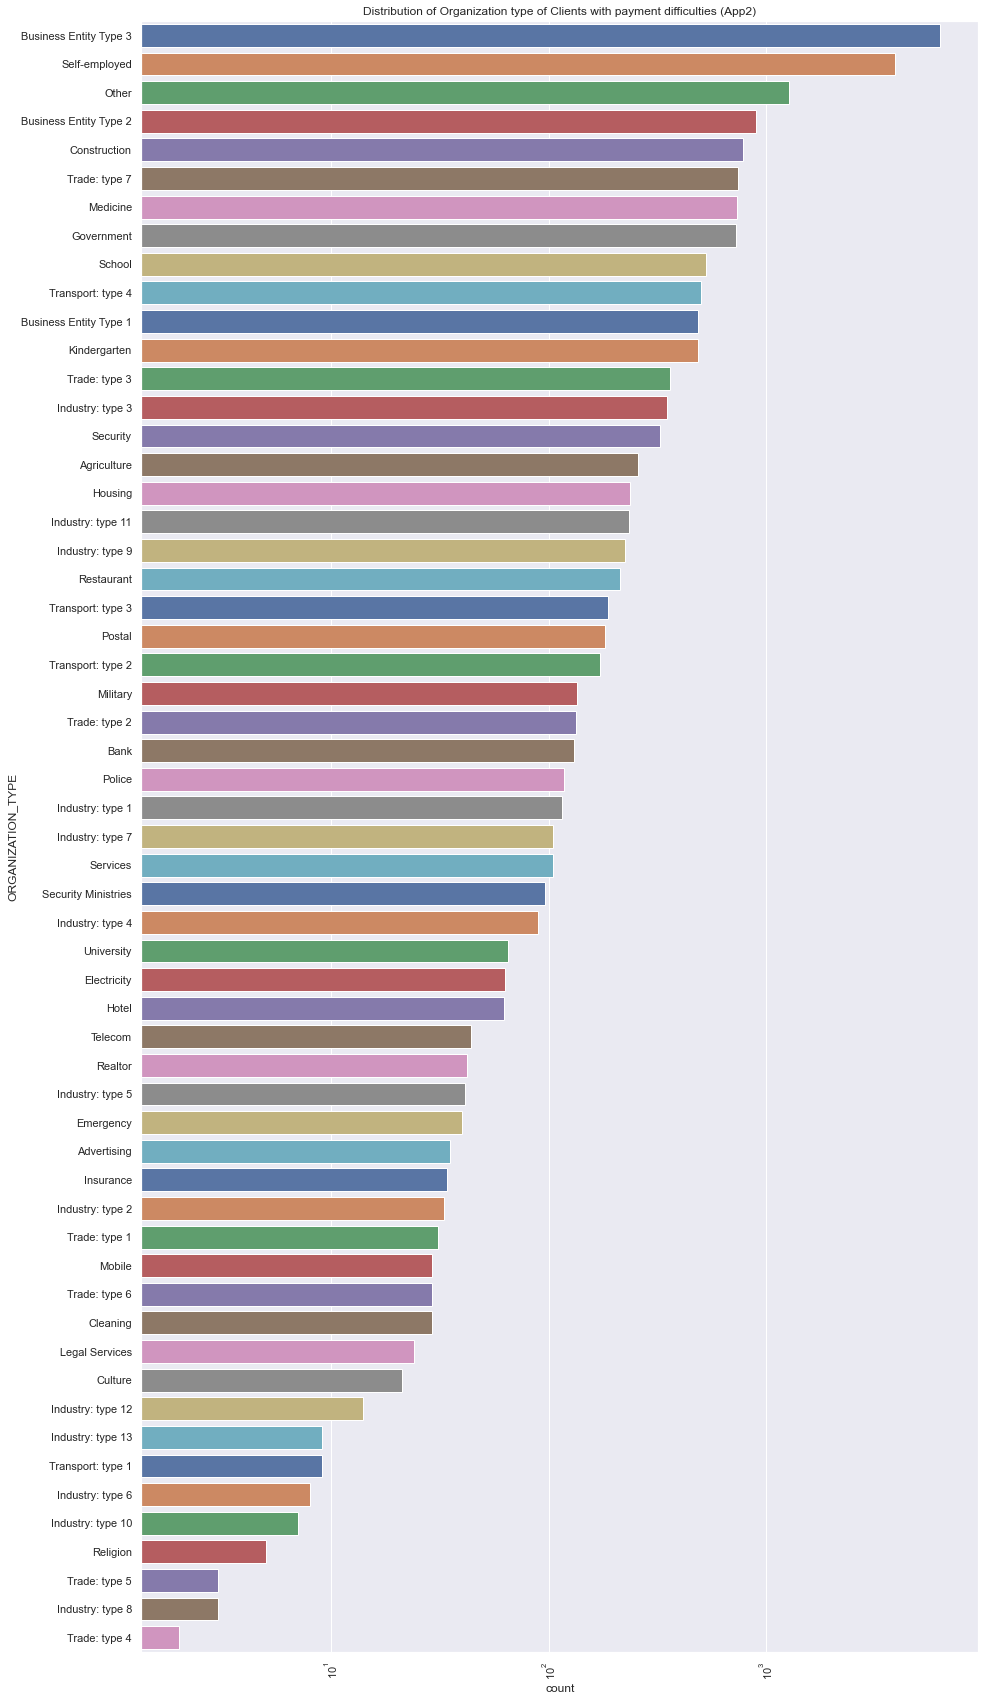

In [202]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))

plt.title("Distribution of Organization type of Clients with payment difficulties (App2)")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data = App2, y = 'ORGANIZATION_TYPE', order = App2['ORGANIZATION_TYPE'].value_counts().index, palette='deep')

plt.show()

In [203]:
#### Correlation analysis of numerical variables

In [204]:
App2.select_dtypes(include=["int64","float64"]).shape

(24825, 15)

In [205]:
corr_App2 = App2.select_dtypes(include=["int64","float64"]).corr()

In [206]:
corr_App2.head()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
SK_ID_CURR,1.000000,NaN,-0.001290,-0.010165,-0.005161,-0.006342,0.000831,-0.003816,-0.004135,-0.007954,0.006436,-0.000880,-0.007578,-0.005936,-0.001814
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,-0.001290,NaN,1.000000,0.038131,0.001930,0.025854,0.010157,0.051224,-0.071377,0.003008,0.055038,-0.017467,0.752195,-0.059193,0.982783
AMT_INCOME_TOTAL,-0.010165,NaN,0.038131,1.000000,-0.014977,-0.000158,0.009889,0.006654,-0.022808,-0.000272,0.004114,-0.001133,0.046421,-0.021486,0.037591
DAYS_EMPLOYED,-0.005161,NaN,0.001930,-0.014977,1.000000,0.192455,-0.040574,-0.186515,0.002888,0.021520,-0.025091,0.014426,-0.081207,0.003490,0.006648


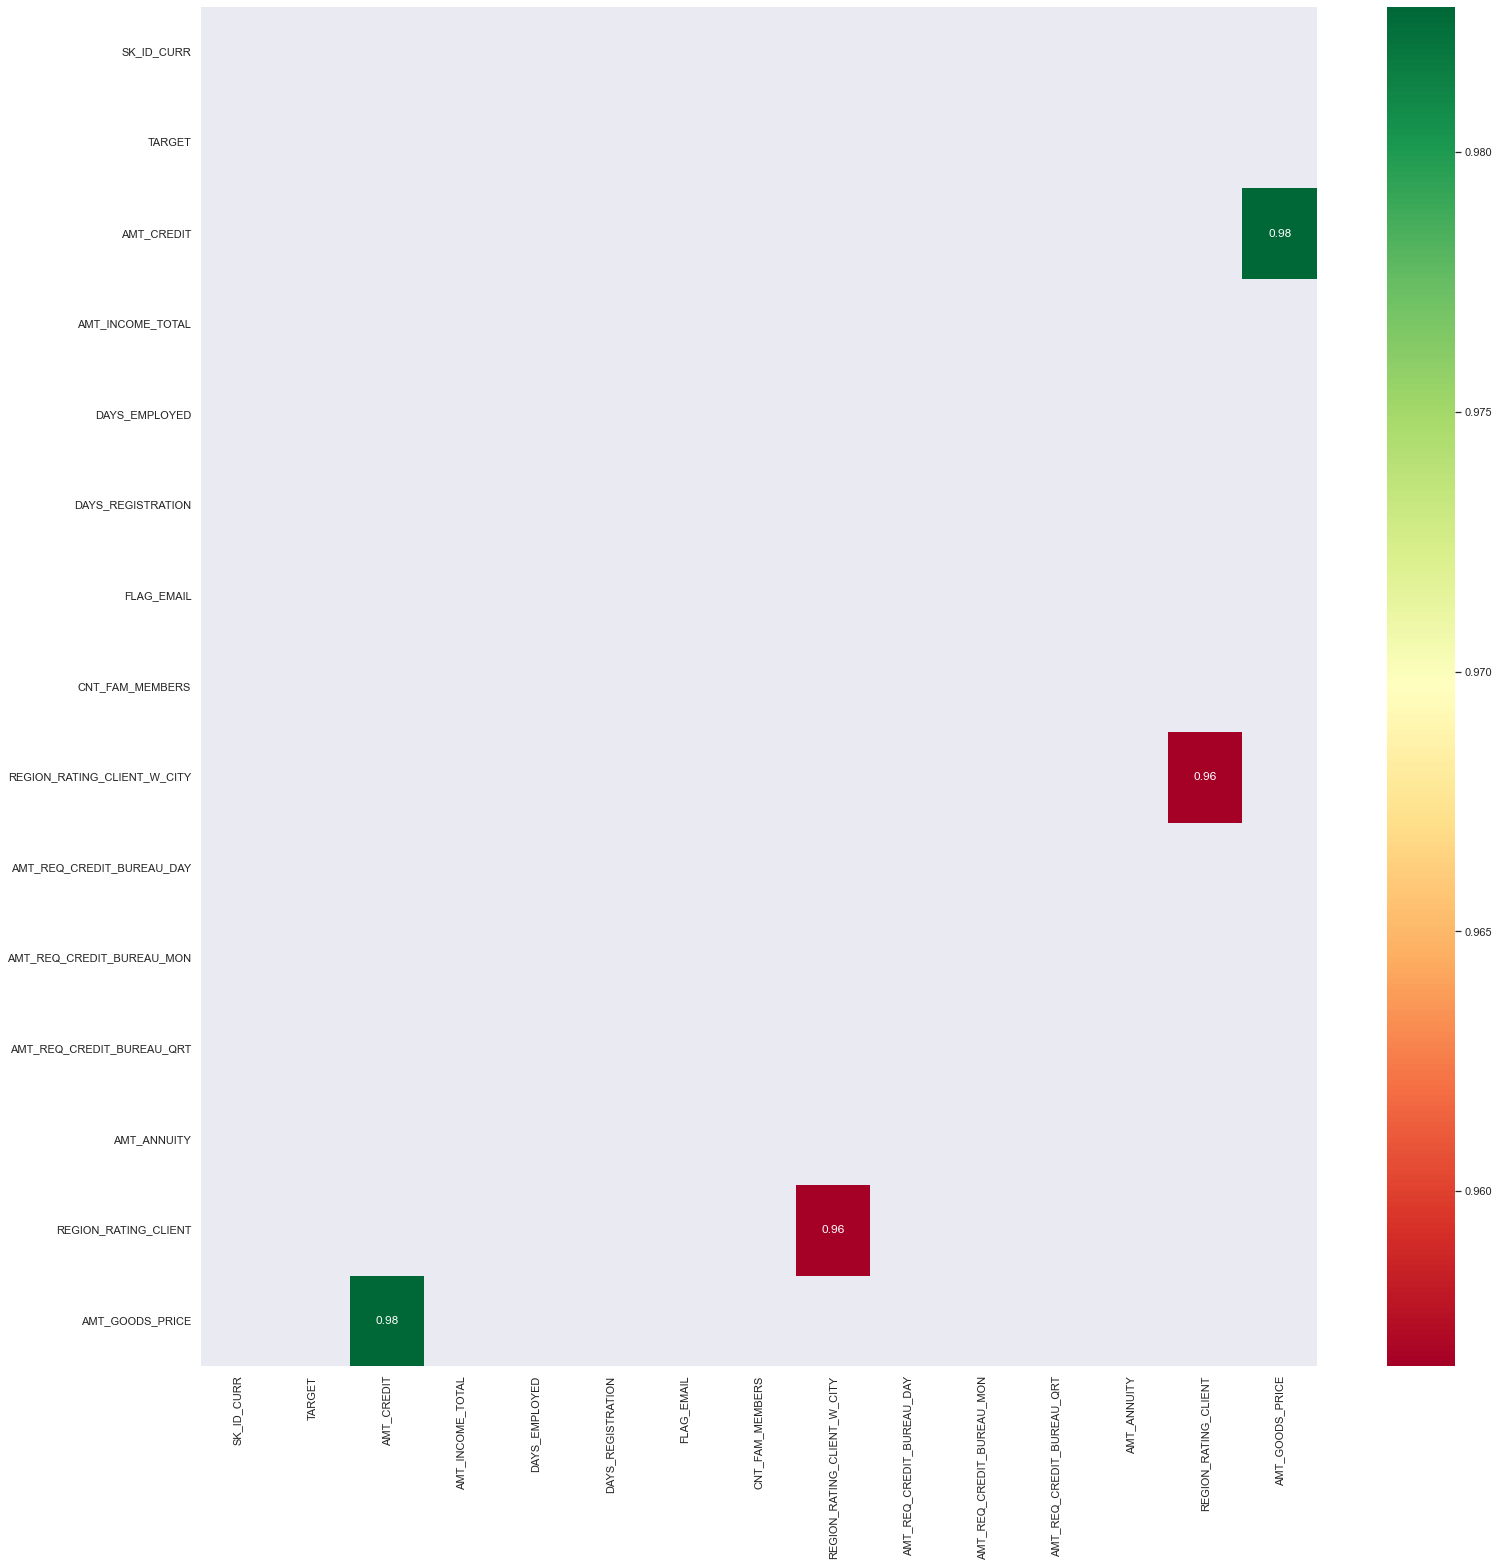

In [207]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_App2[(corr_App2 >= 0.8) & (corr_App2 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [208]:
corr_App2[corr_App2 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752295
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752295
                             AMT_CREDIT                     0.752195
AMT_CREDIT                   AMT_ANNUITY                    0.752195
DAYS_EMPLOYED                DAYS_REGISTRATION              0.192455
DAYS_REGISTRATION            DAYS_EMPLOYED                  0.192455
FLAG_EMAIL                   AMT_ANNUITY                    0.078188
AMT_ANNUITY                  FLAG_EMAIL                     0.078188
                             CNT_FAM_MEMBERS                0.075711
CNT_FAM_MEMBERS              AMT_ANNUITY                    0.075711
AMT_REQ_CREDIT_BUREAU_MON    AMT_G

In [209]:
App1.select_dtypes(include=["int64","float64"]).shape

(282686, 15)

In [210]:
corr_App1 = App1.select_dtypes(include=["int64","float64"]).corr()

In [211]:
corr_App1.head()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
SK_ID_CURR,1.000000,NaN,-0.000342,0.001739,0.001744,0.001475,0.000229,-0.002790,-0.000739,-0.001725,0.000054,0.001148,0.000071,-0.000519,-0.000235
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,-0.000342,NaN,1.000000,0.342799,-0.070104,-0.013477,0.017074,0.064536,-0.112238,0.004409,0.054071,0.017767,0.771297,-0.103337,0.987022
AMT_INCOME_TOTAL,0.001739,NaN,0.342799,1.000000,-0.140392,-0.064937,0.083705,0.034256,-0.200466,0.007862,0.061470,0.013128,0.418948,-0.186573,0.349426
DAYS_EMPLOYED,0.001744,NaN,-0.070104,-0.140392,1.000000,0.214511,-0.064850,-0.238301,0.040461,-0.000874,-0.034890,0.015116,-0.104975,0.038328,-0.068527


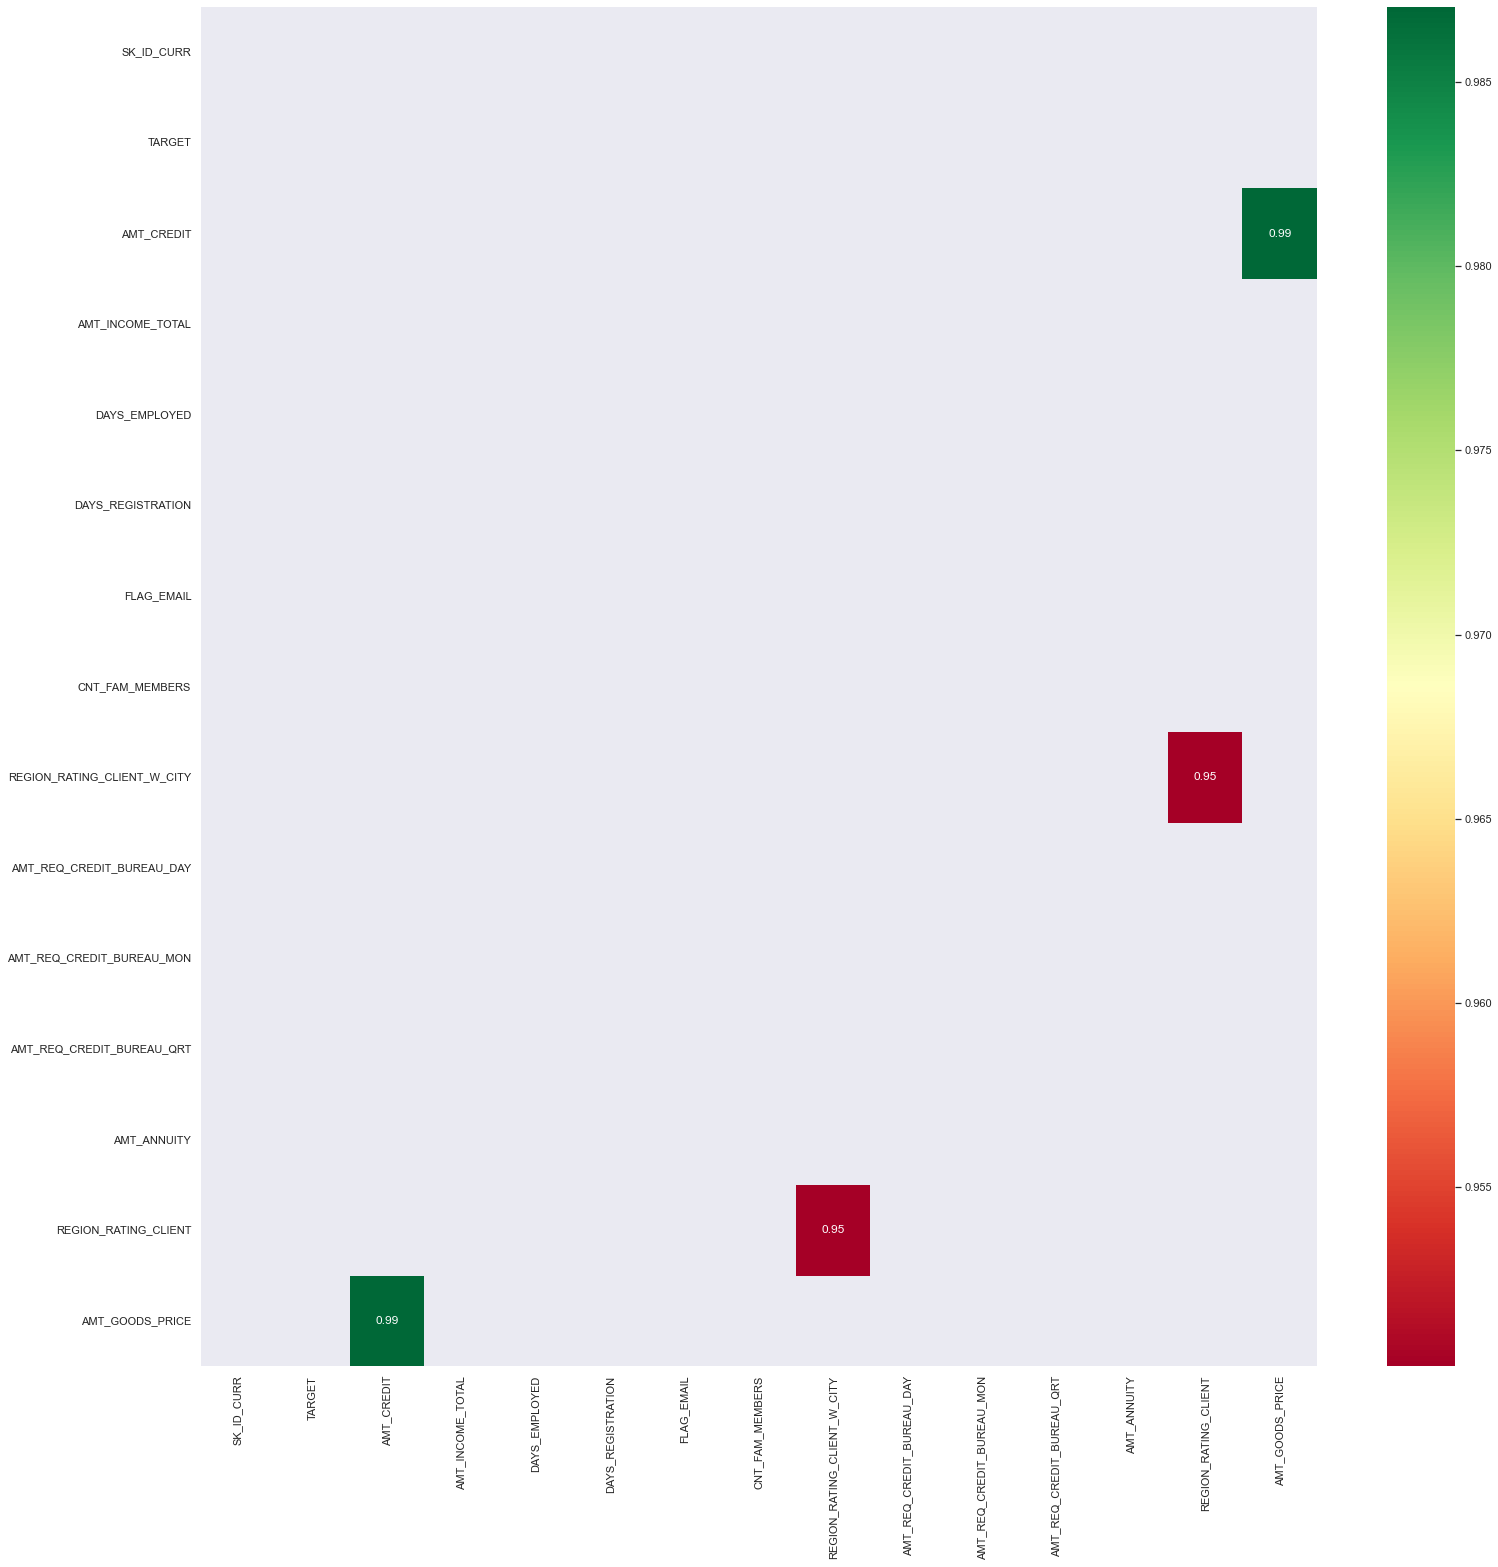

In [212]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_App1[(corr_App1 >= 0.8) & (corr_App1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [213]:
corr_App1[corr_App1 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776421
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776421
                             AMT_CREDIT                     0.771297
AMT_CREDIT                   AMT_ANNUITY                    0.771297
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.418948
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.418948
                             AMT_GOODS_PRICE                0.349426
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.349426
AMT_CREDIT                   AMT_INCOME_TOTAL               0.342799
AMT_INCOME_TOTAL             AMT_CREDIT                     0.342799
DAYS_REGISTRATION            DAYS_

In [214]:
#### Univariate analysis of numerical variables

In [215]:
Q1 = App2['AMT_CREDIT'].quantile(0.25)
Q3 = App2['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


In [216]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Min value before which outlier exist: {}".format(Min_value1))
print("Max value after which outlier exist: {}".format(Max_value1))

Min value before which outlier exist: -388973.25
Max value after which outlier exist: 1406688.75


In [217]:
Q1 = App1['AMT_CREDIT'].quantile(0.25)
Q3 = App1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


In [218]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Min value before which outlier exist: {}".format(Min_value1))
print("Max value after which outlier exist: {}".format(Max_value1))

Min value before which outlier exist: -388973.25
Max value after which outlier exist: 1406688.75


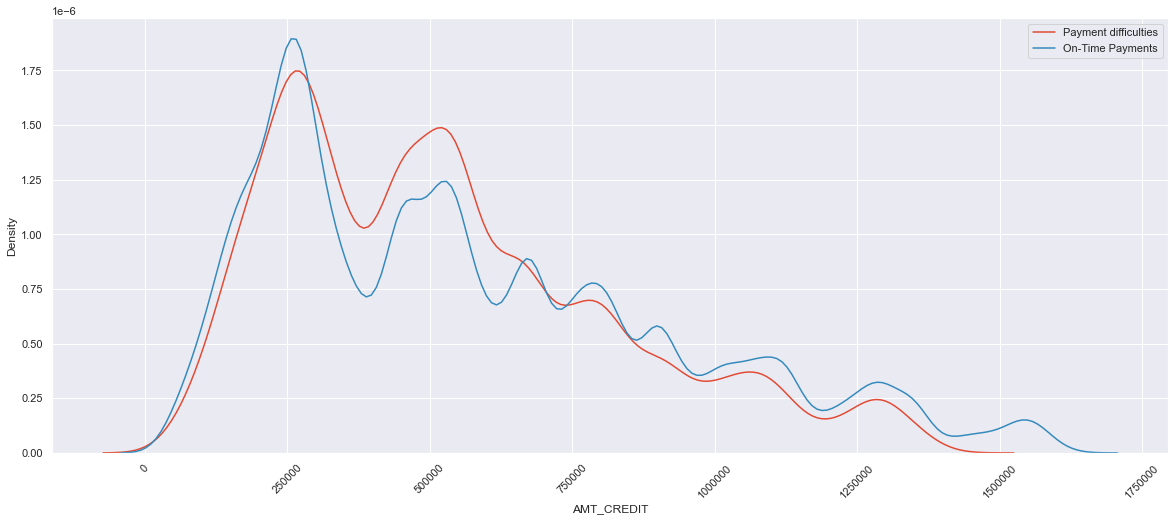

In [219]:
plt.figure(figsize = [20,8])
sns.distplot(App2[App2['AMT_CREDIT'] <= Max_value1].AMT_CREDIT,label = 'Payment difficulties', hist=False)
sns.distplot(App1[App1['AMT_CREDIT'] <= Max_value0].AMT_CREDIT,label = 'On-Time Payments', hist=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

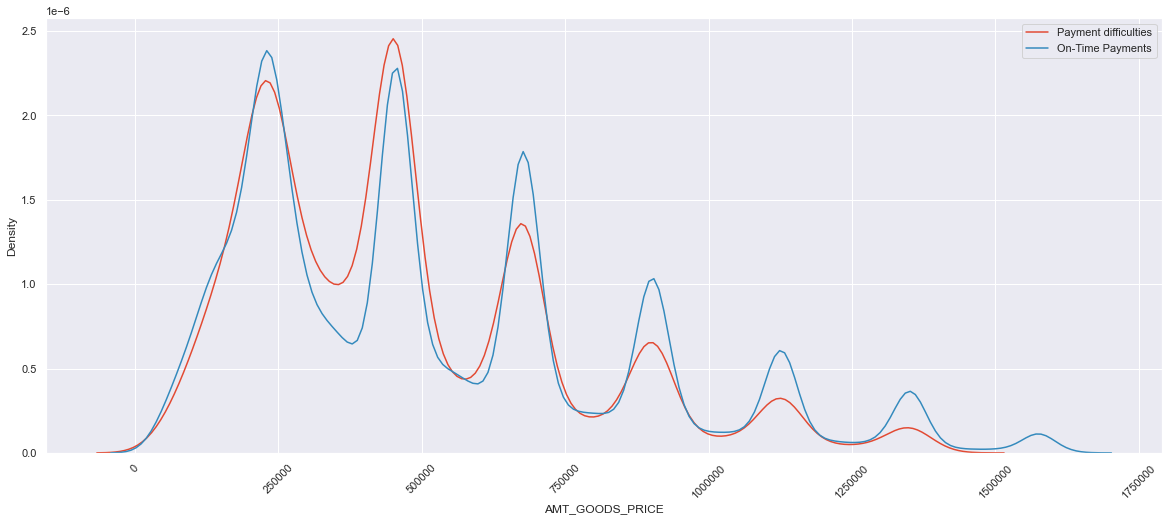

In [220]:
plt.figure(figsize = [20,8])
sns.distplot(App2[App2['AMT_GOODS_PRICE'] <= Max_value1].AMT_GOODS_PRICE,label = 'Payment difficulties', hist=False)
sns.distplot(App1[App1['AMT_GOODS_PRICE'] <= Max_value0].AMT_GOODS_PRICE,label = 'On-Time Payments', hist=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

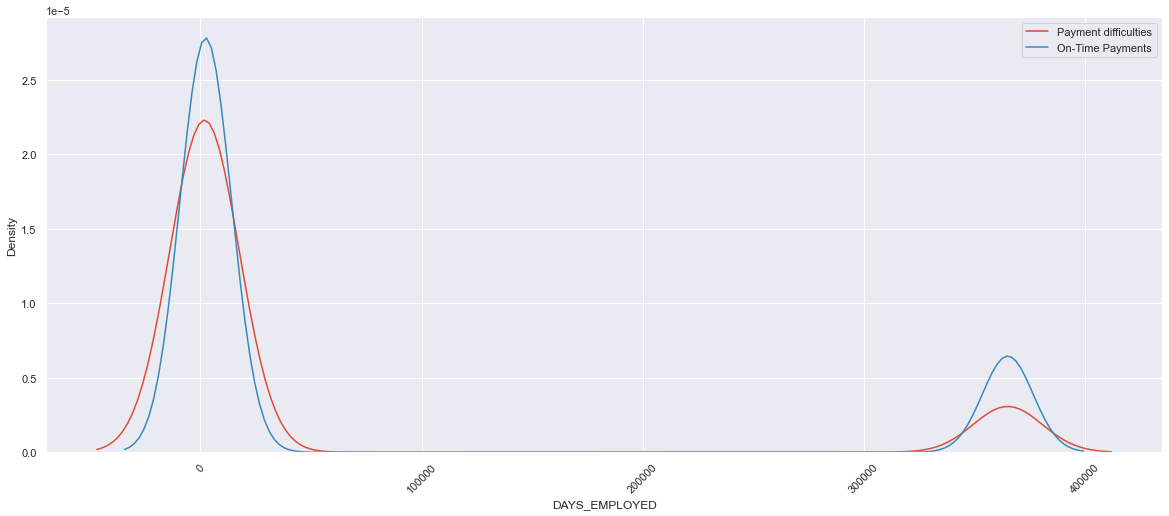

In [221]:
plt.figure(figsize = [20,8])
sns.distplot(App2[App2['DAYS_EMPLOYED'] <= Max_value1].DAYS_EMPLOYED,label = 'Payment difficulties', hist=False)
sns.distplot(App1[App1['DAYS_EMPLOYED'] <= Max_value0].DAYS_EMPLOYED,label = 'On-Time Payments', hist=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

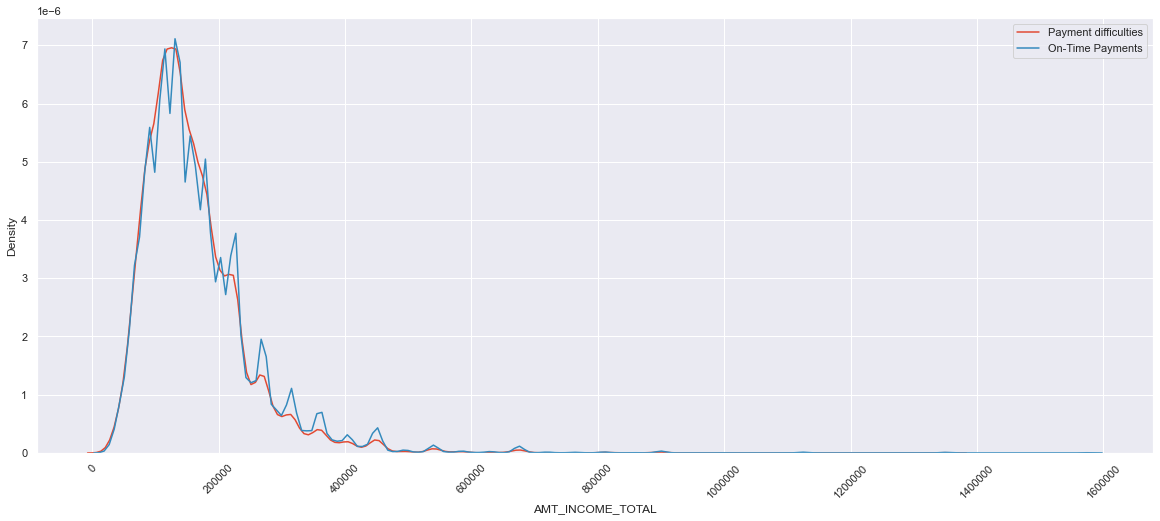

In [222]:
plt.figure(figsize = [20,8])
sns.distplot(App2[App2['AMT_INCOME_TOTAL'] <= Max_value1].AMT_INCOME_TOTAL,label = 'Payment difficulties', hist=False)
sns.distplot(App1[App1['AMT_INCOME_TOTAL'] <= Max_value0].AMT_INCOME_TOTAL,label = 'On-Time Payments', hist=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [223]:
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=App1,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=App2,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

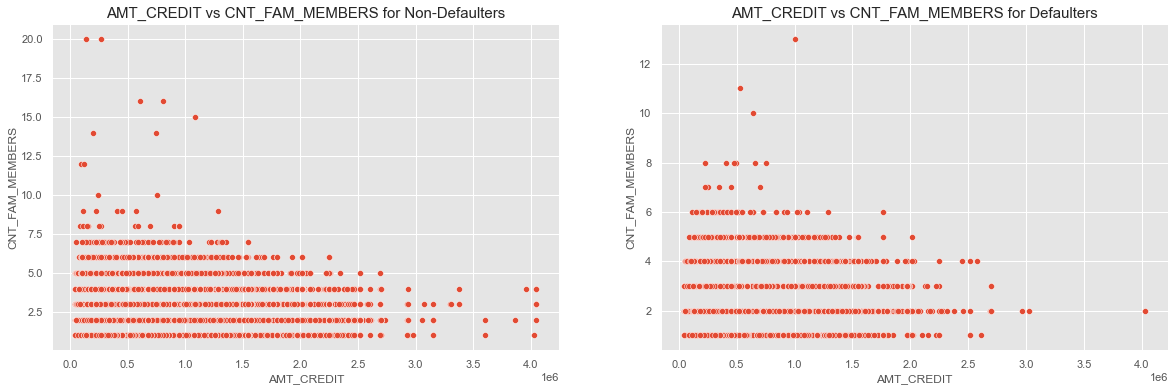

In [224]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

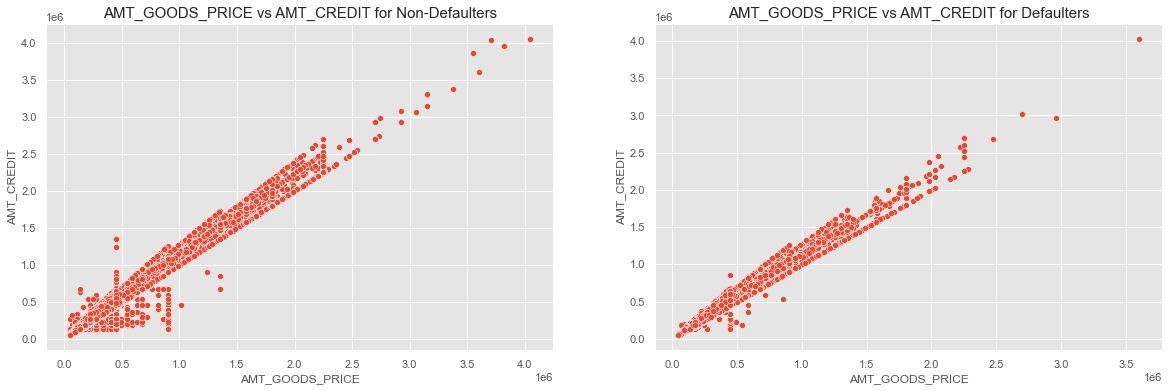

In [225]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')

In [228]:
#Separting the categorical columns from the numerical ones
obj_dtypes = [i for i in CurrentApplication.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in CurrentApplication.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [229]:
#Previous Application Data Check

In [230]:
PreviousApplication.shape

(1670214, 37)

In [231]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
PreviousApplication.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [233]:
PreviousApplication.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [234]:
PreviousApplication.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [235]:
Data Analysis For PreviousApplication Data


SyntaxError: invalid syntax (Temp/ipykernel_25044/453608452.py, line 1)

In [236]:
Checking the PreviousApplication dataset

SyntaxError: invalid syntax (Temp/ipykernel_25044/1015838227.py, line 1)

In [237]:
#percentage of missing values

In [238]:
round(PreviousApplication.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [239]:
Inference:
Way too many columns have missing data.
OPTIONS:
Impute values in columns having % of missing values < 50
Delete columns having more than %50 missing values as they cannot help in analysis.
Data Cleaning:

SyntaxError: invalid syntax (Temp/ipykernel_25044/605724936.py, line 1)

In [240]:
#Deleting columns with missing values > 50%

PreviousApplication = PreviousApplication.drop(["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [241]:
#finding the percentage of missing values
(PreviousApplication.isnull().sum()/len(PreviousApplication.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [242]:
Checking for missing values to impute in columns

SyntaxError: invalid syntax (Temp/ipykernel_25044/3104187956.py, line 1)

In [243]:
#COLUMN: [AMT_ANNUITY]
#(Loan annuity of previous application)

In [244]:
PreviousApplication['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [245]:
pd.options.display.float_format = "{:.2f}".format #to display in decimal form
PreviousApplication["AMT_ANNUITY"].describe()

count   1297979.00
mean      15955.12
std       14782.14
min           0.00
25%        6321.78
50%       11250.00
75%       20658.42
max      418058.15
Name: AMT_ANNUITY, dtype: float64

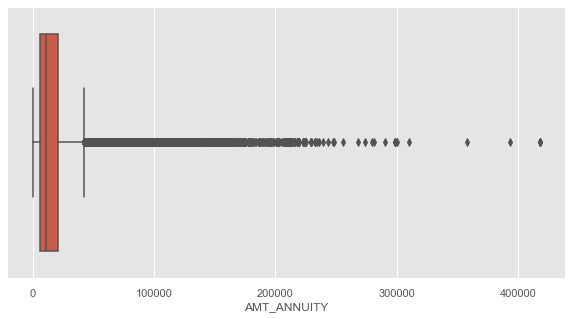

In [246]:
# AMT_ANNUITY is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(PreviousApplication['AMT_ANNUITY'])
plt.show()

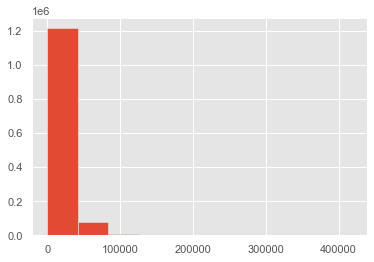

In [247]:
#plotting a histogram to see data visually
plt.hist(PreviousApplication["AMT_ANNUITY"])
plt.show()

In [248]:
#We can see most values lie between min and 50%. 
# Since AMT_ANNUITY has  outlier, we can choose median to impute the column
#Using median to impute missing values as mean would skew the data

PreviousApplication["AMT_ANNUITY"].median(skipna = True)

11250.0

In [249]:
PreviousApplication["AMT_ANNUITY"] = PreviousApplication["AMT_ANNUITY"].fillna(PreviousApplication["AMT_ANNUITY"].median(skipna = True))

In [250]:
PreviousApplication.isnull().sum() #verifying there are no null values in AMT_ANNUITY after imputation

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [251]:
#COLUMN: [AMT_GOODS_PRICE]
#(For consumer loans it is the price of the goods for which the loan is given for PreviousApplication)

In [252]:
PreviousApplication['AMT_GOODS_PRICE'].value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

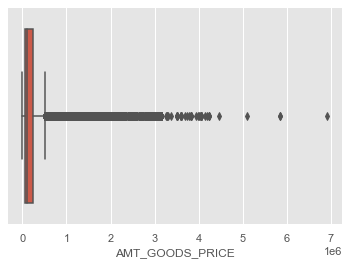

In [253]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(PreviousApplication['AMT_GOODS_PRICE'])
plt.show()

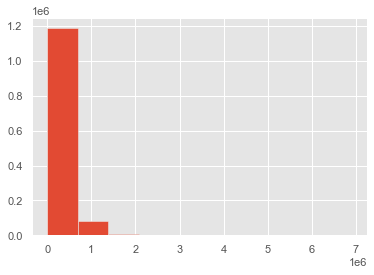

In [254]:
#plotting a histogram to see data visually
plt.hist(PreviousApplication['AMT_GOODS_PRICE'])
plt.show()

In [255]:
#We can see most values lie between min and 50%. 
# Since AMT_GOODS_PRICE has  outlier, we can choose median to impute the column
#Using median to impute missing values as mean would skew the data

PreviousApplication["AMT_GOODS_PRICE"].median(skipna = True)

112320.0

In [256]:
PreviousApplication["AMT_GOODS_PRICE"] = PreviousApplication["AMT_GOODS_PRICE"].fillna(PreviousApplication["AMT_GOODS_PRICE"].median(skipna = True))

In [257]:
PreviousApplication.isnull().sum() #verifying there are no null values in AMT_ANNUITY after imputation

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [258]:
#COLUMN: [Name_Type_Suite]
#(For consumer loans it is the price of the goods for which the loan is given for PreviousApplication)

In [259]:
PreviousApplication['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [260]:
PreviousApplication["NAME_TYPE_SUITE"].describe

<bound method NDFrame.describe of 0                      NaN
1            Unaccompanied
2          Spouse, partner
3                      NaN
4                      NaN
                ...       
1670209                NaN
1670210      Unaccompanied
1670211    Spouse, partner
1670212             Family
1670213             Family
Name: NAME_TYPE_SUITE, Length: 1670214, dtype: object>

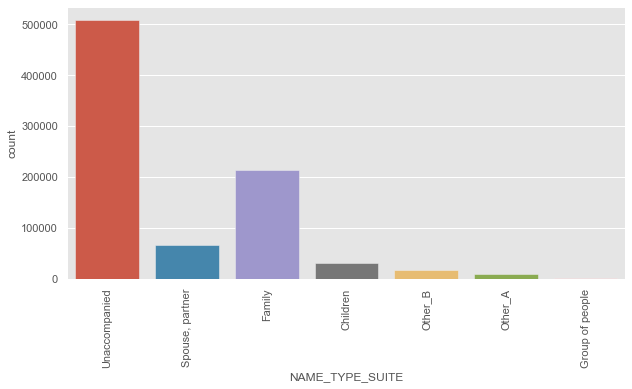

In [261]:
plt.figure(figsize = (10,5))
sns.countplot(data = PreviousApplication, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

In [262]:
PreviousApplication["NAME_TYPE_SUITE"].fillna(value = 'Unknown', inplace = True)

In [263]:
#### Univariate analysis

In [264]:
# function to count plot for categorical variables

def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=PreviousApplication,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

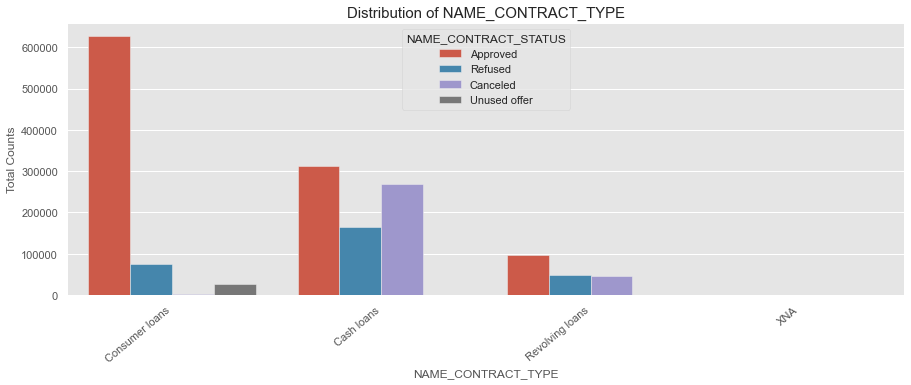

In [265]:
plot_uni('NAME_CONTRACT_TYPE')

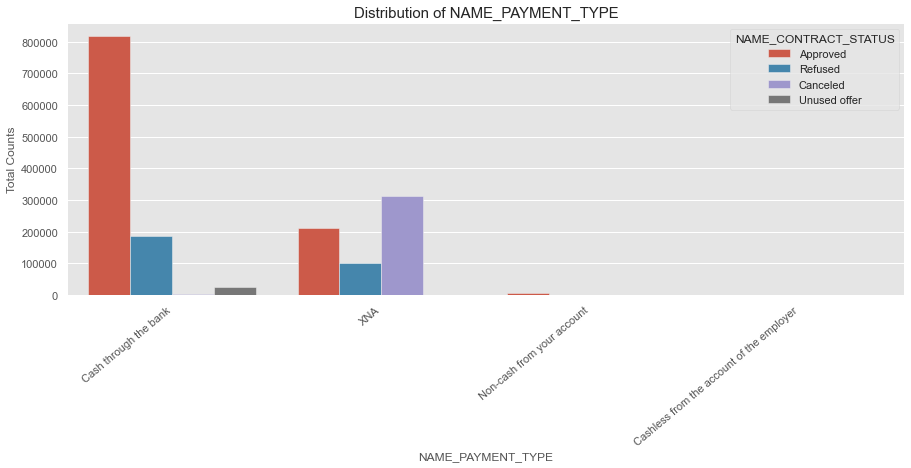

In [266]:
plot_uni('NAME_PAYMENT_TYPE')

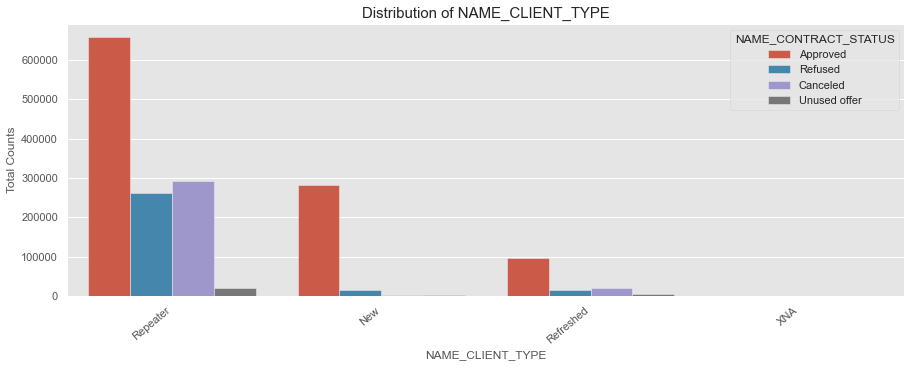

In [267]:
plot_uni('NAME_CLIENT_TYPE')

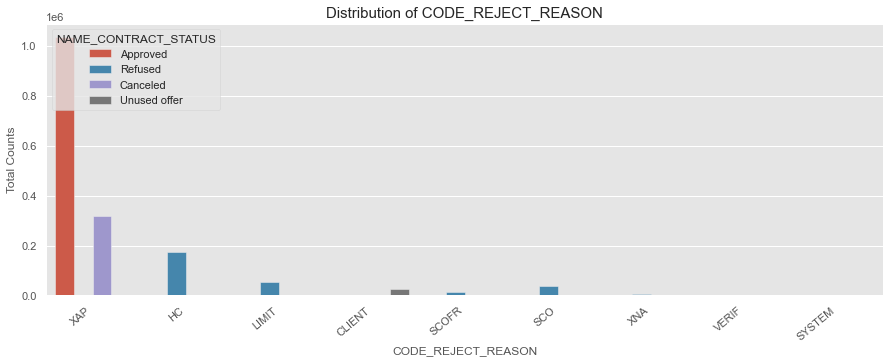

In [268]:
plot_uni("CODE_REJECT_REASON")

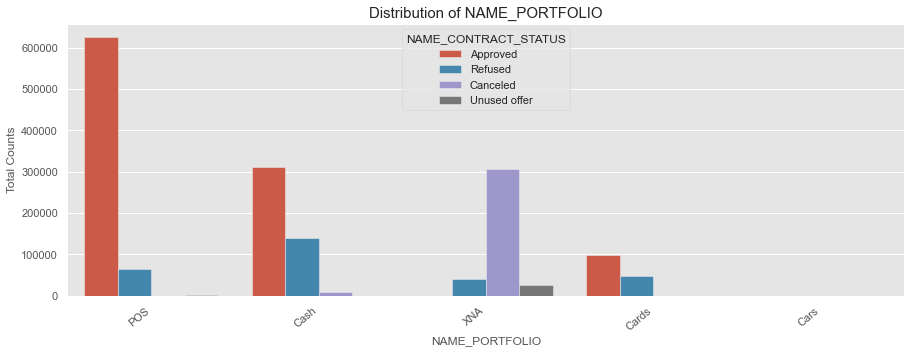

In [269]:
plot_uni("NAME_PORTFOLIO")

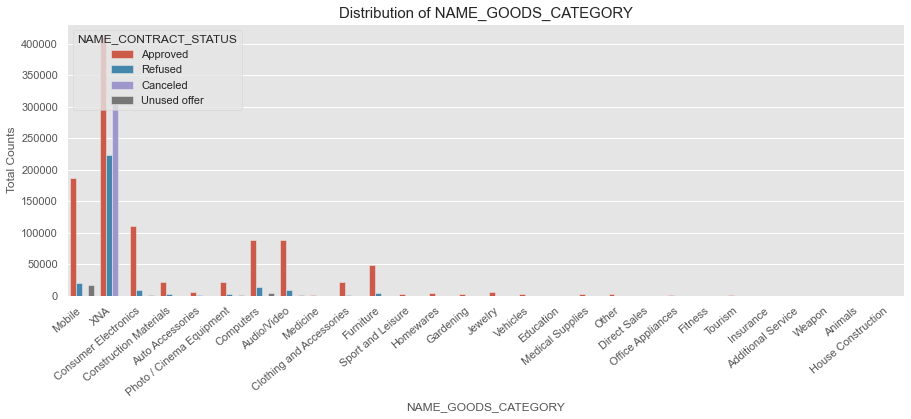

In [270]:
plot_uni("NAME_GOODS_CATEGORY")

In [271]:
## Univariate analysis of numerical columns

In [272]:
corr=PreviousApplication.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.99,0.99
71,AMT_CREDIT,AMT_APPLICATION,0.98,0.98
89,AMT_GOODS_PRICE,AMT_CREDIT,0.97,0.97
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.93,0.93
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.82,0.82
70,AMT_CREDIT,AMT_ANNUITY,0.81,0.81
53,AMT_APPLICATION,AMT_ANNUITY,0.81,0.81
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.80,0.80
173,CNT_PAYMENT,AMT_APPLICATION,0.68,0.68
174,CNT_PAYMENT,AMT_CREDIT,0.67,0.67


In [30]:
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


<Figure size 1440x576 with 0 Axes>

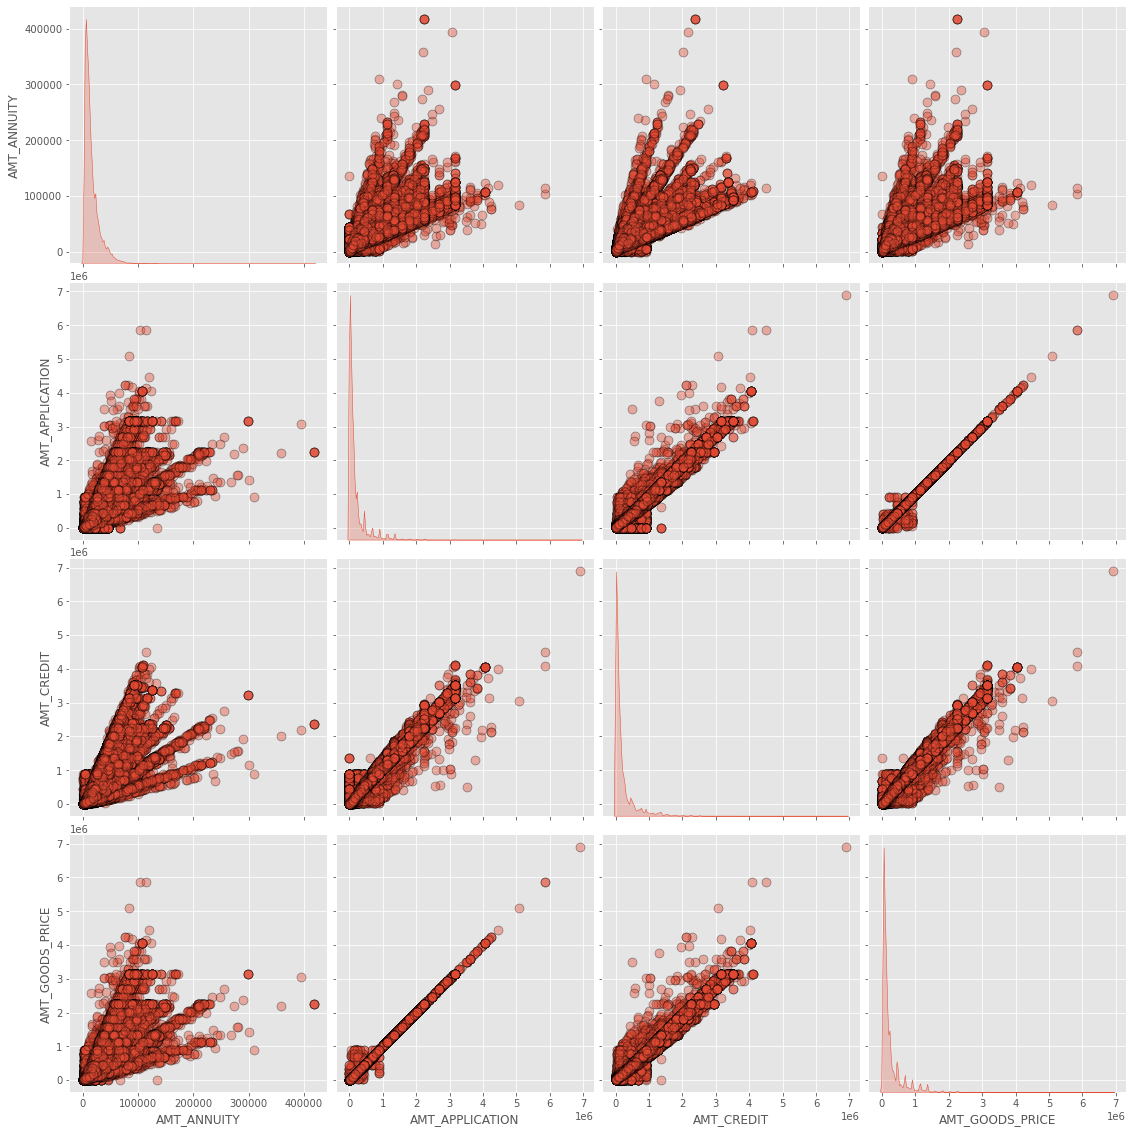

In [32]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(PreviousApplication[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

In [62]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=PreviousApplication)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

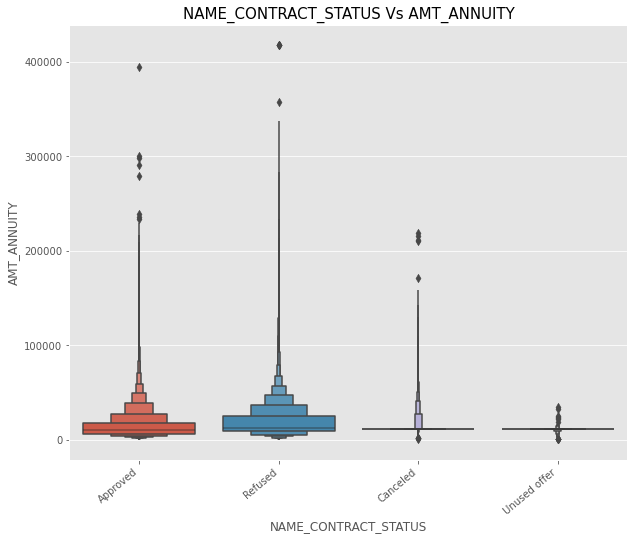

In [63]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

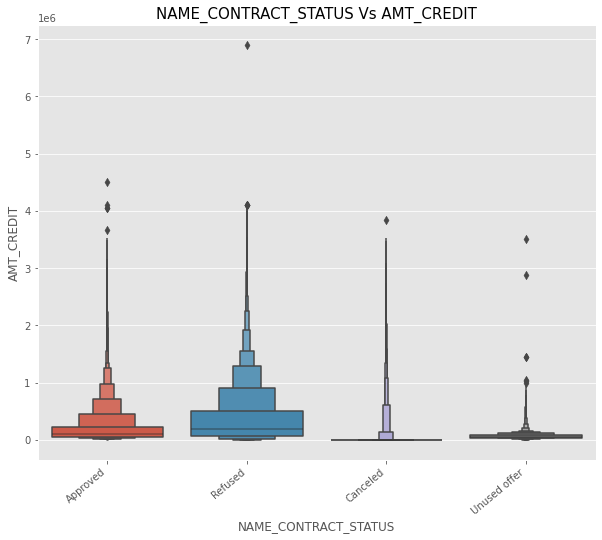

In [64]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

In [ ]:
#Joining the two data sets by a common column (SK_ID_CURR) for further comparison and analysis

In [66]:
CurrPrev = pd.merge(CurrentApplication, PreviousApplication, how='left', on=['SK_ID_CURR'])

In [67]:
CurrPrev.shape

(1430155, 154)

In [68]:
CurrPrev.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0,0,0,0,0,0,0,0,0,0,0,0,0.

In [69]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = CurrPrev.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

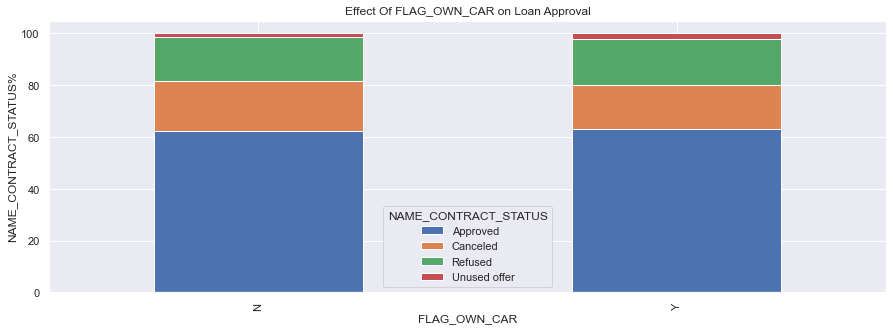

In [70]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

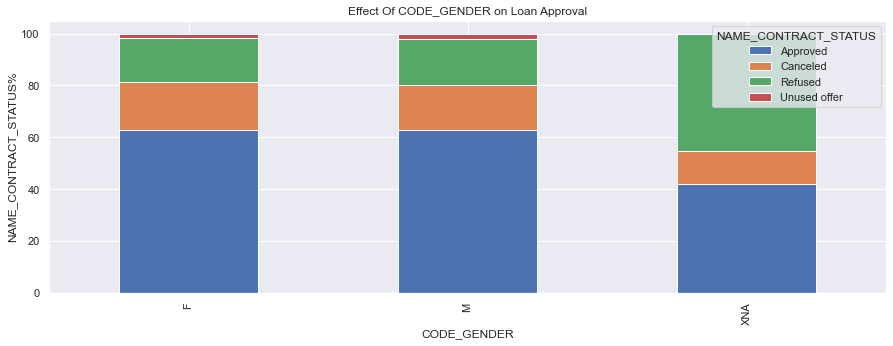

In [71]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

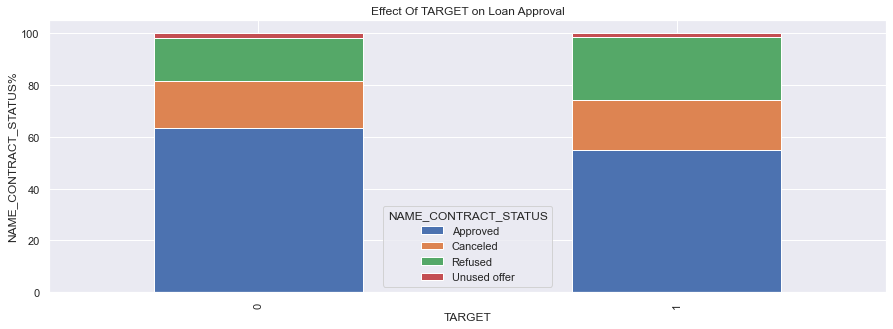

In [72]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')


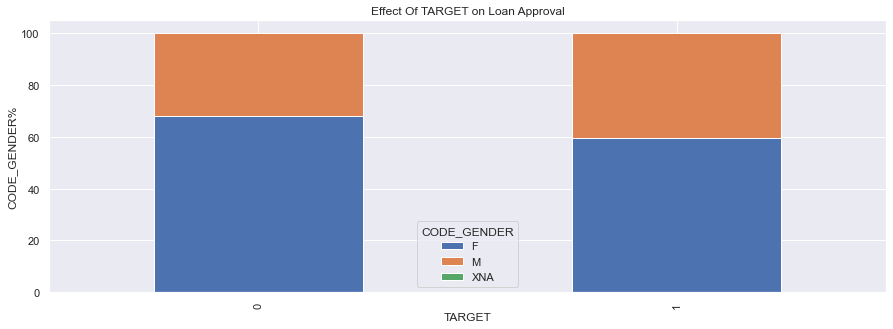

In [73]:
plotuni_combined('TARGET','CODE_GENDER')


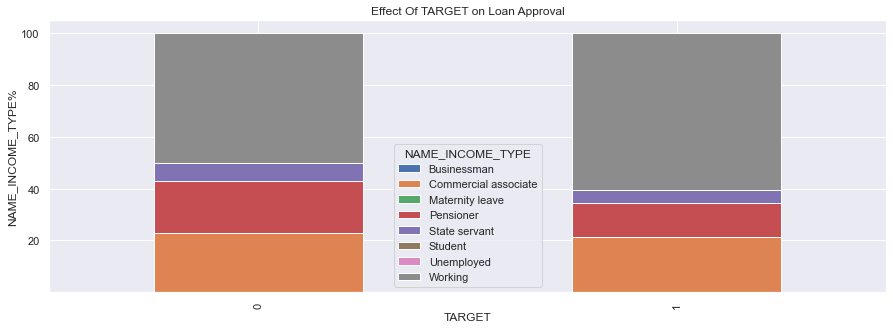

In [74]:
plotuni_combined('TARGET','NAME_INCOME_TYPE')

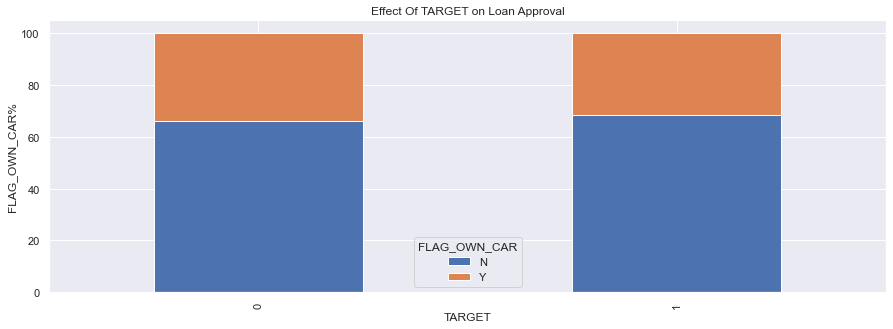

In [75]:
plotuni_combined('TARGET',"FLAG_OWN_CAR")

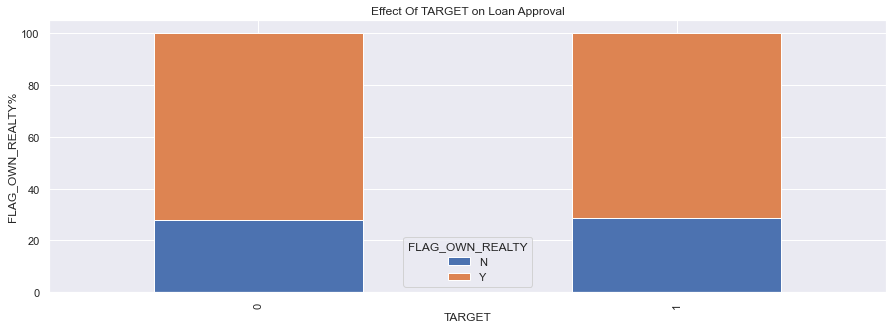

In [76]:
plotuni_combined('TARGET',"FLAG_OWN_REALTY")

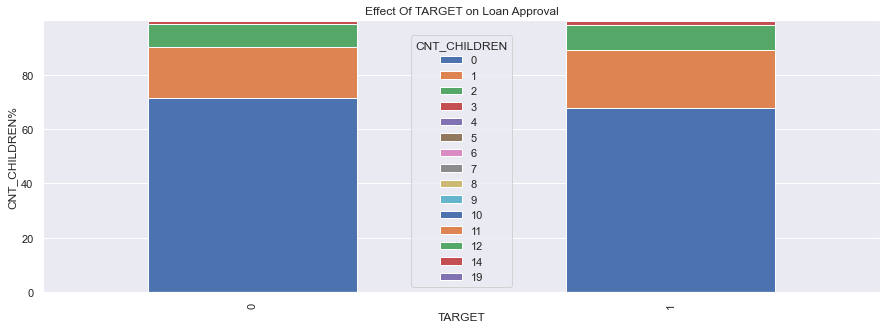

In [77]:
plotuni_combined('TARGET',"CNT_CHILDREN")

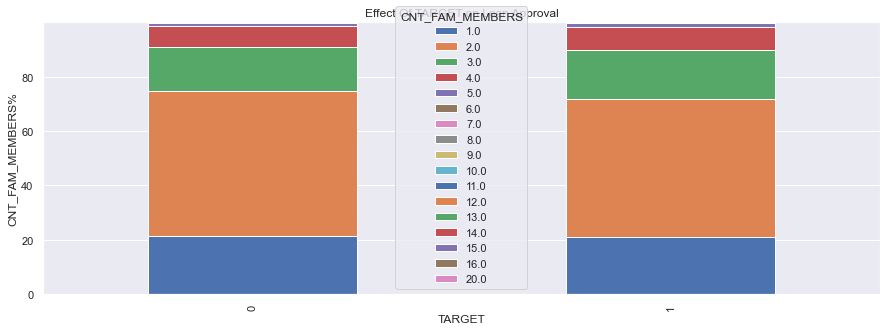

In [78]:
plotuni_combined('TARGET',"CNT_FAM_MEMBERS")

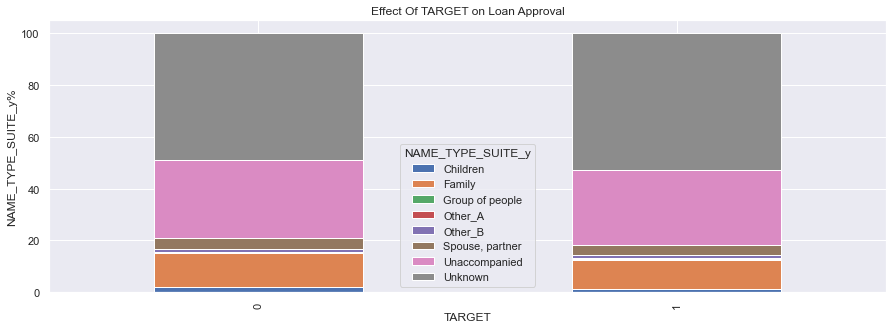

In [79]:
plotuni_combined('TARGET',"NAME_TYPE_SUITE_y")

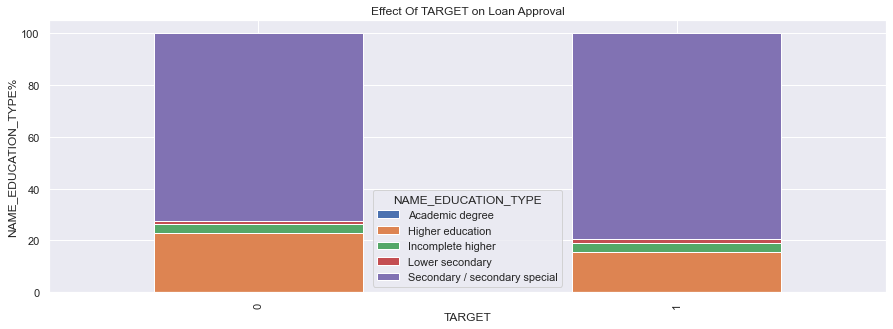

In [80]:
plotuni_combined('TARGET',"NAME_EDUCATION_TYPE")

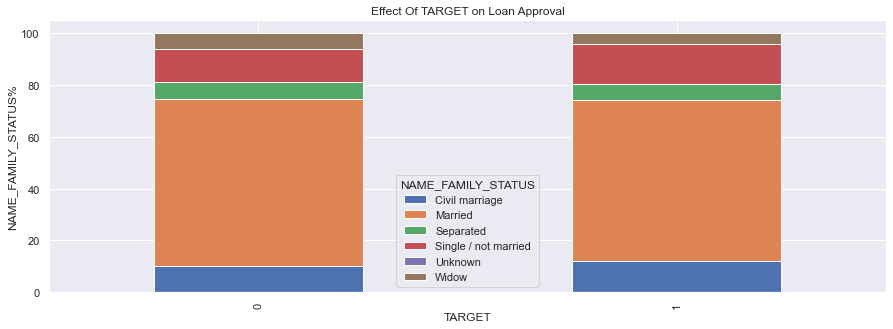

In [87]:
plotuni_combined('TARGET',"NAME_FAMILY_STATUS")

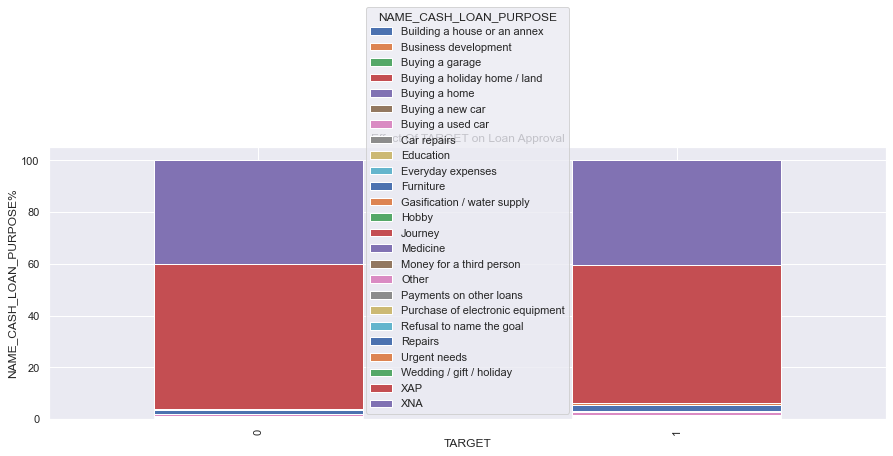

In [88]:
plotuni_combined('TARGET','NAME_CASH_LOAN_PURPOSE')

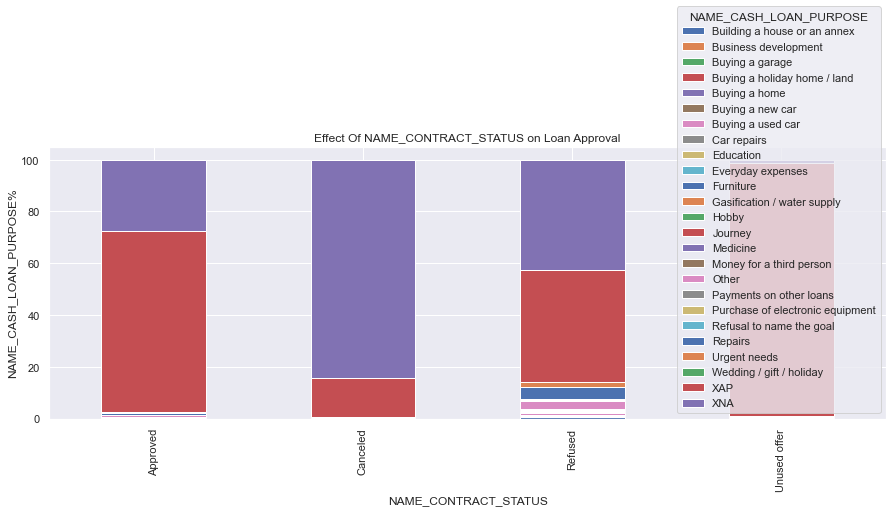

In [89]:
plotuni_combined('NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE')

In [91]:
repayerData = CurrPrev[CurrPrev['TARGET'] == 0]
defaulterData = CurrPrev[CurrPrev['TARGET'] == 1]

In [92]:
repayerData.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                SK_ID_CURR                   1.000000
YEARS_BUILD_MEDI          YEARS_BUILD_AVG              0.998599
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998574
FLOORSMIN_AVG             FLOORSMIN_MEDI               0.997248
ENTRANCES_MEDI            ENTRANCES_AVG                0.996929
                                                         ...   
EXT_SOURCE_1              DAYS_BIRTH                  -0.604928
DAYS_EMPLOYED             DAYS_BIRTH                  -0.627513
DAYS_FIRST_DRAWING        DAYS_LAST_DUE_1ST_VERSION   -0.801063
FLAG_EMP_PHONE            DAYS_EMPLOYED               -0.999771
SK_ID_CURR                TARGET                            NaN
Length: 7212, dtype: float64

In [93]:
top10_CorrTarget0 = repayerData[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "AMT_APPLICATION", "DAYS_TERMINATION", "DAYS_LAST_DUE", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_GOODS_PRICE_y", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "AMT_CREDIT_y", "AMT_ANNUITY_y"]].copy()

In [94]:
top10_CorrTarget0.shape

(1306815, 16)

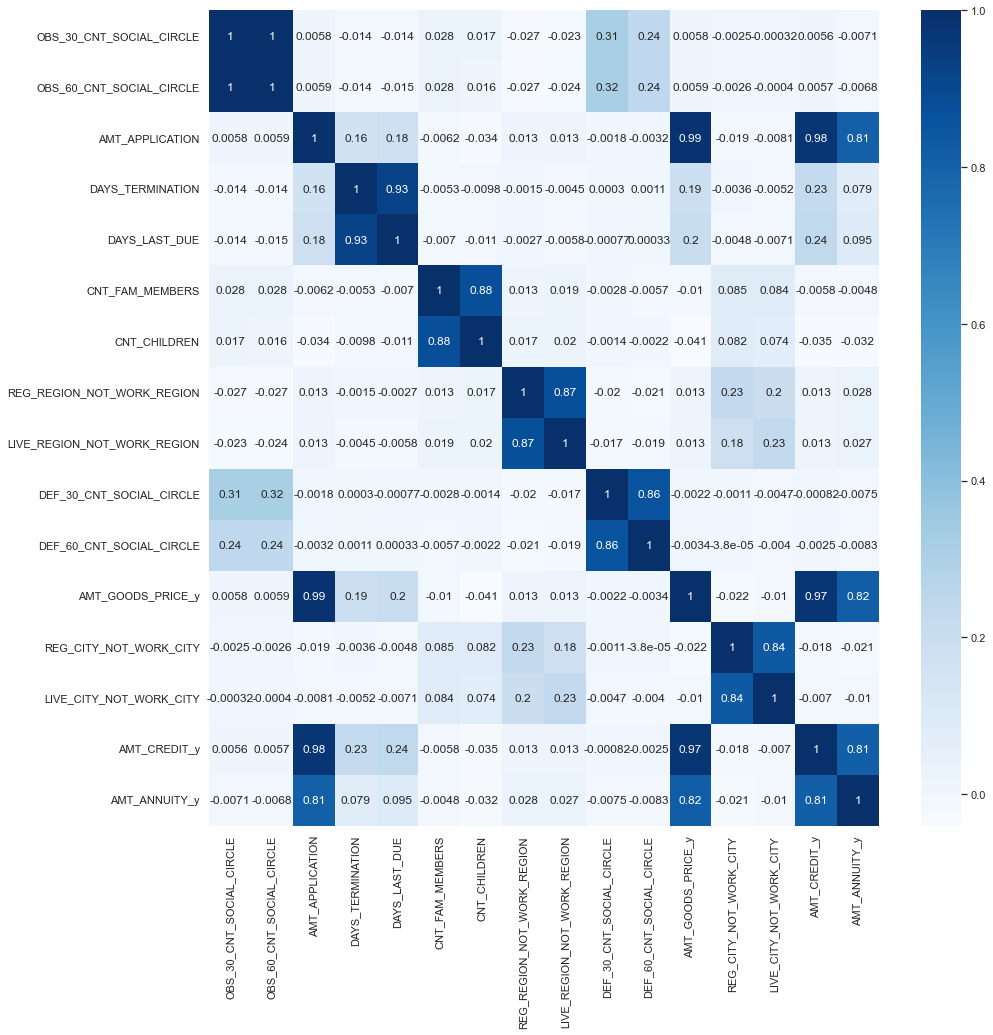

In [96]:

corr_target0 = top10_CorrTarget0.corr()

plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target0, cmap="Blues", annot=True)

plt.show()

In [97]:
defaulterData.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                 SK_ID_CURR                  1.000000
YEARS_BUILD_AVG            YEARS_BUILD_MEDI            0.998453
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE    0.998380
BASEMENTAREA_MEDI          BASEMENTAREA_AVG            0.998322
FLOORSMIN_MEDI             FLOORSMIN_AVG               0.998145
                                                         ...   
DAYS_EMPLOYED              DAYS_BIRTH                 -0.580581
FLAG_DOCUMENT_6            FLAG_EMP_PHONE             -0.591139
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         -0.886465
DAYS_EMPLOYED              FLAG_EMP_PHONE             -0.999789
SK_ID_CURR                 TARGET                           NaN
Length: 6758, dtype: float64

In [98]:
defaulterData.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                 SK_ID_CURR                  1.000000
YEARS_BUILD_AVG            YEARS_BUILD_MEDI            0.998453
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE    0.998380
BASEMENTAREA_MEDI          BASEMENTAREA_AVG            0.998322
FLOORSMIN_MEDI             FLOORSMIN_AVG               0.998145
                                                         ...   
DAYS_EMPLOYED              DAYS_BIRTH                 -0.580581
FLAG_DOCUMENT_6            FLAG_EMP_PHONE             -0.591139
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         -0.886465
DAYS_EMPLOYED              FLAG_EMP_PHONE             -0.999789
SK_ID_CURR                 TARGET                           NaN
Length: 6758, dtype: float64

In [106]:
#Adding the top10 correlated columns into a new dataframe:
top10_CorrTarget1 = defaulterData[["OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_APPLICATION", "AMT_CREDIT_y", "DAYS_TERMINATION", "DAYS_LAST_DUE", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "LIVE_REGION_NOT_WORK_REGION", "REG_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY", "AMT_GOODS_PRICE_y", "AMT_ANNUITY_x", "AMT_CREDIT_x"]].copy()

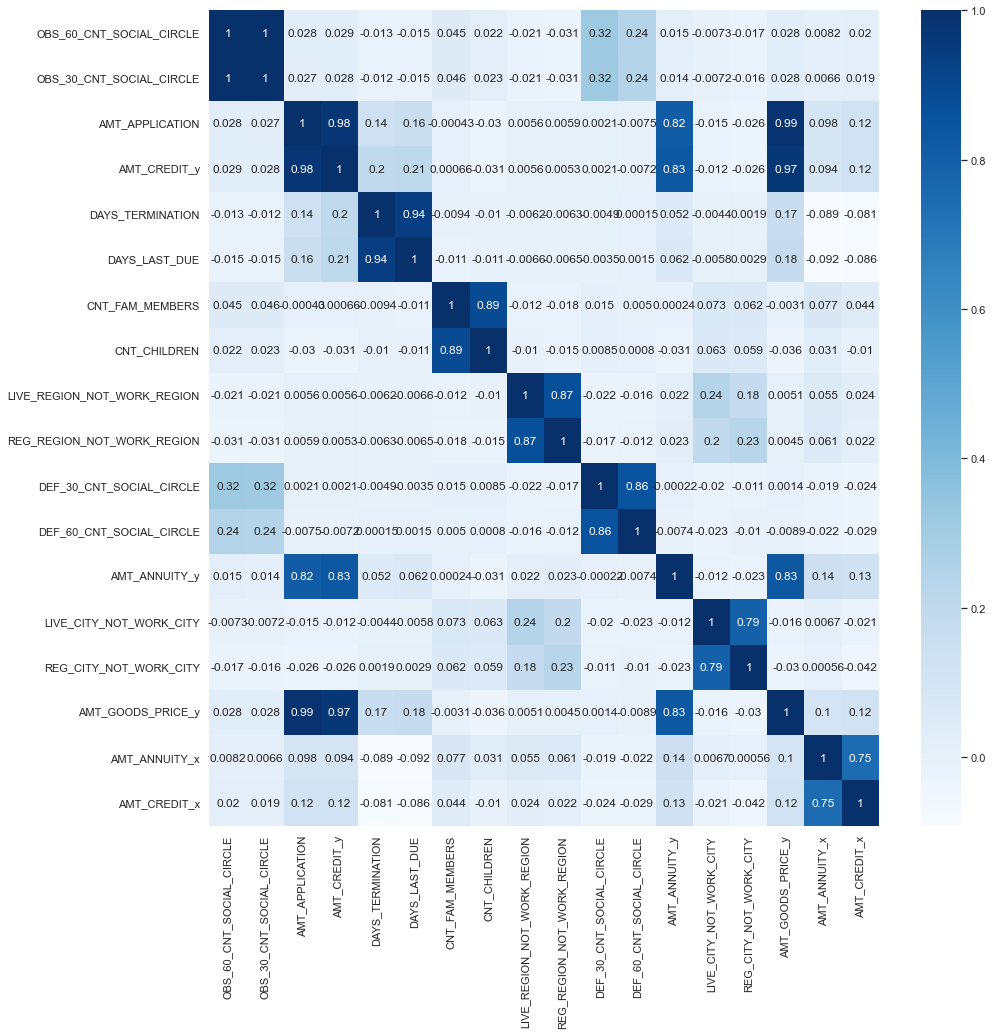

In [107]:
corr_target1 = top10_CorrTarget1.corr()

plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target1, cmap="Blues", annot=True)

plt.show()